# Project description:

Dr. Zeus has gathered some data from 1000 patients that have diabetes in a timespan of a year. The data has several columns depicting various information regarding how they are managing their condition. 

- 'Kolku dolgo e dijabeticar' - a column depicting (in years) the length of the condition that the patient has had,


- 'Kolku mu e tromesechen (hemoglobin A1C) she4er' - a column depicting the last measured value of the hemoglobin A1C sugar levels every three months., 


- 'Dali e na insulin ili na tabli?' - information whether a patient is on insulin (value 1) or tablets (value 0), 


- 'Glukoza (momentalna) vo krv' - information about current glucose level, 


- 'Dali ima dijabetesna retinopatija?' - information whether the patient has (value 1) or does not have (value 0) diabetic retinopathy.

    ## What needs to be done?


- 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.


- 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything). ..........(3 points total)


- 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves. .......... (3 points)


- 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.   .......... (3 points)


- 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results? .......... (3 points)


- 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups. .......... (4 points)


- 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible. .......... (4 points)

---

### Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---

### 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.

In [2]:
# I renamed the folders and the files inside for faster aproach for me 
# 01 Medicine Scenario -> Medicine_sc 
# Diabetes_data.csv -> diab_sc.csv
# 01 Medicine Scenario Clean Code.ipynb -> medicine_sc_cc.ipynb

# Reading the csv file
diab_df = pd.read_csv('diab_sc.csv')

In [3]:
diab_df

,Unnamed: 0,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
0,0,3.0,9.522692,0.0,1.747037,1.0
1,1,40.0,6.397994,0.0,6.416253,1.0
2,2,38.0,7.079202,0.0,7.006710,0.0
3,3,16.0,4.400294,1.0,5.614222,0.0
4,4,17.0,4.746816,1.0,4.919372,1.0
...,...,...,...,...,...,...
995,995,25.0,8.890070,0.0,5.404914,0.0
996,996,44.0,11.036004,1.0,7.315449,0.0
997,997,42.0,4.943409,0.0,6.568171,0.0
998,998,29.0,6.485128,0.0,4.110812,1.0


---

### 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything).

In [4]:
# Changing the names of all of the colums from the data frame
diab_df = diab_df.rename(columns = {'Unnamed: 0' : 'Patient ID', 
                                    'Kolku dolgo e dijabeticar' : 'Duration of the condition',
                                    'Kolku mu e tromesechen (hemoglobin A1C) she4er':'Hemoglobin A1C',
                                    'Dali e na insulin ili na tabli?':'Therapy',
                                    'Glukoza (momentalna) vo krv':'Glucose lvl',
                                    'Dali ima dijabetesna retinopatija?':'Diabetic Retinopaty'
                                    })

In [5]:
# Filling the rows that are NaN with 0
diab_df = diab_df.fillna(0)

# Changing the types of the colums bellow
diab_df = diab_df.astype({'Patient ID':'int',
                         'Duration of the condition':'int',
                         'Diabetic Retinopaty':'boolean'
                         })

In [6]:
# Changing the type f the column from float to string
diab_df['Therapy'] = diab_df['Therapy'].astype(str)

# changing the valuse fo 0's to Insulin and for 1's to Tablets
diab_df.loc[diab_df['Therapy'] == '1.0', 'Therapy'] = 'Insulin'
diab_df.loc[diab_df['Therapy'] == '0.0', 'Therapy'] = 'Tablets'

In [7]:
diab_df

,Patient ID,Duration of the condition,Hemoglobin A1C,Therapy,Glucose lvl,Diabetic Retinopaty
0,0,3,9.522692,Tablets,1.747037,True
1,1,40,6.397994,Tablets,6.416253,True
2,2,38,7.079202,Tablets,7.006710,False
3,3,16,4.400294,Insulin,5.614222,False
4,4,17,4.746816,Insulin,4.919372,True
...,...,...,...,...,...,...
995,995,25,8.890070,Tablets,5.404914,False
996,996,44,11.036004,Insulin,7.315449,False
997,997,42,4.943409,Tablets,6.568171,False
998,998,29,6.485128,Tablets,4.110812,True


---

### 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves.

In [47]:
# Creating a custom color pallete for the bar plots and setting a styl for all the plots
custom_pallete = ['#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594']
sns.set_style("whitegrid")

In [532]:
# Creatin a df for Patients ID's and their glucose levels
glucose_level_by_patient = diab_df.groupby('Patient ID')['Glucose lvl'].mean().sort_values(ascending = False)

# Casting the values to list, for x axis and y axis for the bar plot
index = list(glucose_level_by_patient.index)
value = list(glucose_level_by_patient.values)

# Calculating orfinding the patient with maximum glucose levels form all of the 1000 patients
max_glucose = glucose_level_by_patient[:1]
print(f'The Patient ID that has the most glucose level is {max_glucose.index[0]}.')
print(f'With the glucose level of {max_glucose.values[0]} mmol/L.')

The Patient ID that has the most glucose level is 664.
With the glucose level of 12.598831418508324 mmol/L.


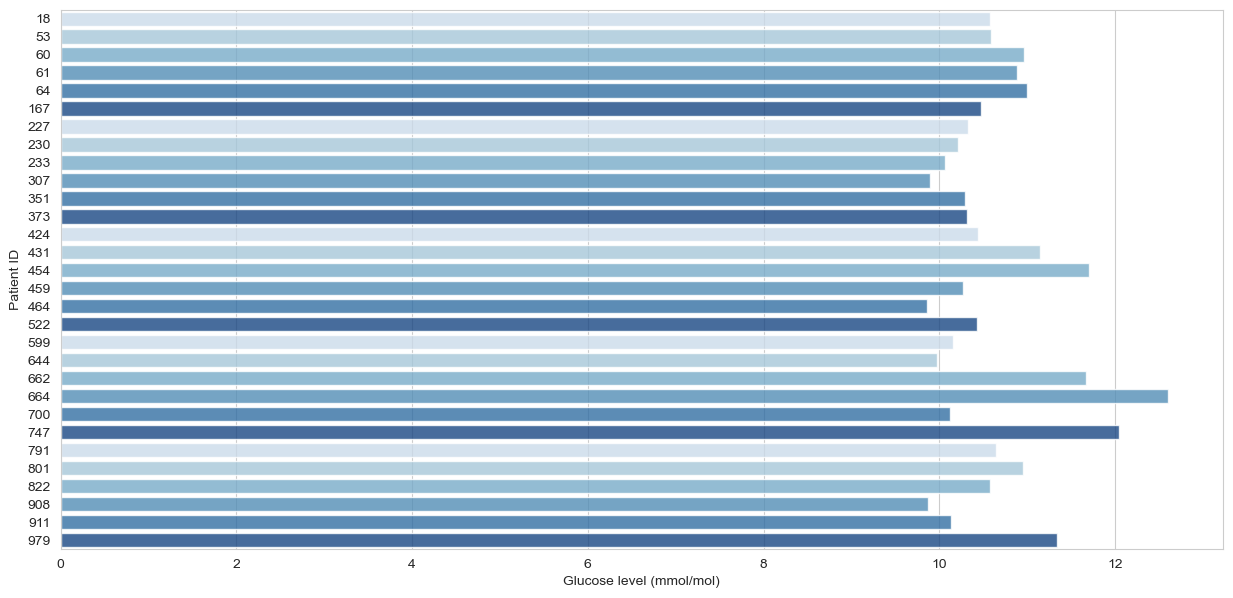

In [542]:
# Seting the size of the bar plot
plt.figure(figsize=(15, 7))

# Labeling the x and y axis
plt.xlabel('Glucose level (mmol/mol)')
plt.ylabel('Patient ID')

# seting a value that returns the bar plot for the first 30 patients that has the highest glucose levels for better visualisation
barplot_1 = sns.barplot(y = index[0:30], x = value[0:30],palette = custom_pallete,orient = 'horizontal',alpha = 0.8)

# Showing that bar plot
plt.show()

##### Describing the plot:

<p>For this request I've used the bar plot to show the resaults.<br>I've decided to show only the 30 patients with the highest glucose levels because If I show all of the 1000 there won't be any space on the x axis for the patients id's.
<br>On the x axis are shown the Patients id's , and on the y axis are shown the glucose levels for each of the patients.
<br>I've organized the resaults by descending order for better understanging of the bar plot , so I can make the patient with the highest glucose level more visible.</p>

##### Drawing a conclusion:
<p>Here we can sumarize that the patient with it's ID 664 has the highest glucose level of aproximately 13 mmol/L (Millimoles Per Litre).<br>We can also conclude that the number of the glucose level from these 30 patients is not drastically falling down, instead it varries from aproximately, 10 mmol/L to 13 mmol/L.
</p>

---

### 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.

In [224]:
# Calculating the average number of glucose levels per duration of the disease
avg_glucoselvl_per_duration = diab_df.groupby('Duration of the condition')['Glucose lvl'].mean()

# Sorting those valuse by descending order to find the highest glucose levels per duration of the disease
max_duration_glucose_level = avg_glucoselvl_per_duration.sort_values(ascending = False)

# Printing out the resault
print(f'The duration that has the highest average glucose levels is of {max_duration_glucose_level.index[0]} years.')
print(f'With average glucose levels of {max_duration_glucose_level.values[0]} mmol/L.')

The duration that has the highest average glucose levels is of 38 years.
With average glucose levels of 6.600725994299679 mmol/L.


In [503]:
# Calculating the average number of hemoglobin A1C levels per lenght of disease/condition.
avg_A1C_per_duration = diab_df.groupby('Duration of the condition')['Hemoglobin A1C'].mean().sort_values(ascending = True)

# Casting the values to list, for x axis and y axis for th bar plot
index_1 = list(avg_A1C_per_duration.index)
value_1 = list(avg_A1C_per_duration.values)

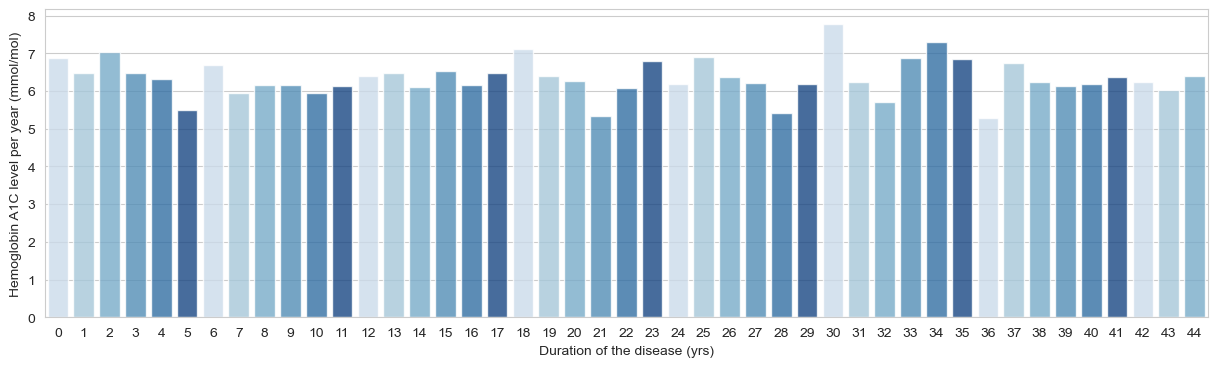

In [541]:
# Seting the size for the bar plot
plt.figure(figsize=(15, 4))

# Labeling the x and y axis
plt.xlabel('Duration of the disease (yrs)')
plt.ylabel('Hemoglobin A1C level per year (mmol/mol)')

# Creating the barplot
barplot = sns.barplot(x = index_1, y = value_1, palette = custom_pallete,alpha = 0.8)


# Showing the plot
plt.show()

##### Describing the plot:
<p>
    On this bar plot I've shown the average number of Hemoglobin A1C per the duration of the disease, that is shown in years.<br>
    On the y axis I've presented the values that consists the average number of Hemoglobin A1C levels (from 0 to 8 mmol/mol).<br>
    On the x axis I've presented the values that consists the duration of the disease (yrs) from all of the 1000 patients.<br>
</p>

##### Drawing a conclusion:
<p>
    We can conclude that the resaults for Hemoglobin A1C are varying from aproximately 5 mmol/mol to 8 mmol/mol.<br>
    We can also see that that patients that were diagnosed with this disease for 30 have the highest average amount of Hemoglobin A1C levels.<br>
    And lastly, the reaslts are not drastically distinctive from one another.<br>
</p>

---

### 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results?

In [49]:
# Calculating the average duration of the diseas for the patients that took insulin and for the patients that took tablets
avg_duration = diab_df.groupby('Therapy')['Duration of the condition'].mean()

# Puting these values and indexes in a variables
index_2 = list(avg_duration.index)
value_2 = list(avg_duration.values)

In [50]:
avg_duration

Therapy
Insulin    22.418468
Tablets    21.859470
Name: Duration of the condition, dtype: float64

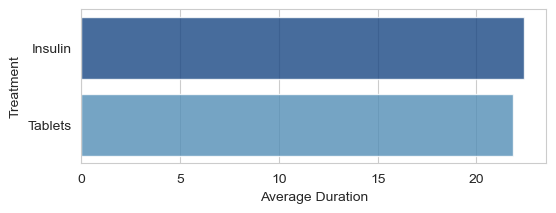

In [98]:
# Changingthe size of the bar plot
plt.figure(figsize=(6, 2))

# Labeling the bar plot
plt.xlabel('Average Duration')
plt.ylabel('Treatment')

# Making another custom pallete from the first one so the colors can b darker
custom_pallet_2 = [custom_pallete[5],custom_pallete[3]]

# Creating the bar plot
barplot_3 = sns.barplot(y = index_2,x = value_2,palette = custom_pallet_2,alpha = 0.8)

# Showing the resaults
plt.show()

##### Comparing the resaults:
<p>
    From the requirement that I understood is that it requres to calculate the average duration of the disease for two groups of patients:<br>
    - Those that use tablets (0)<br>
    - Those that use insulin (1)<br>
    We can analyize that those patients that took insulin the average duration of the disease is greater than those that used tablets.<br>
    Hence, we can make a summary that the second method, using Tablets, is more effecitve than the other one.
</p>

---

### 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups.

In [90]:
# Dividing two groups of patients (One with normal A1C levls, others with high A1C levels)
normal_hemoglobin_patients = diab_df[diab_df['Hemoglobin A1C'] < 5.7]
elevated_hemoglobin_patients = diab_df[diab_df['Hemoglobin A1C'] >= 5.7]


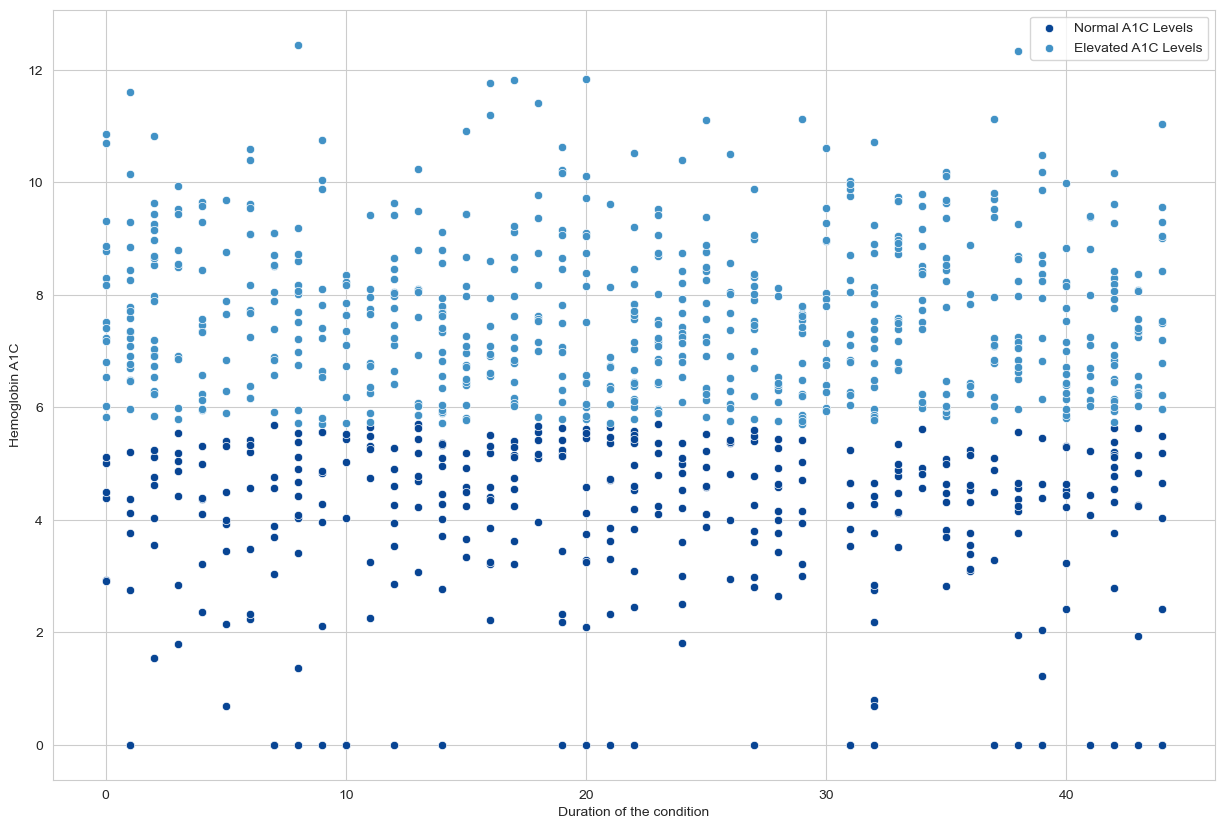

In [155]:
# Changingthe size of the bar plot
plt.figure(figsize=(15, 10))

# Changing the color palette
sns.set_palette(custom_pallet_2)

# Creating two scatter plots (One wih patients with normal hemoglobin levels, other with patients with high hemoglobin levels)
scatter_1 = sns.scatterplot(x = 'Duration of the condition',y = 'Hemoglobin A1C',data = normal_hemoglobin_patients,label='Normal A1C Levels')
scatter_2 = sns.scatterplot(x = 'Duration of the condition',y = 'Hemoglobin A1C',data = elevated_hemoglobin_patients,label = 'Elevated A1C Levels')

# Creating a legend 
plt.legend()

# Showing the resault
plt.show()

---

### 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible.

In [142]:
# Seperating the patients in two groups (One that has Retinopaty, other that doesn't)
has_retinopaty = diab_df[diab_df['Diabetic Retinopaty'] == True]
has_not_retinopaty = diab_df[diab_df['Diabetic Retinopaty'] == False]

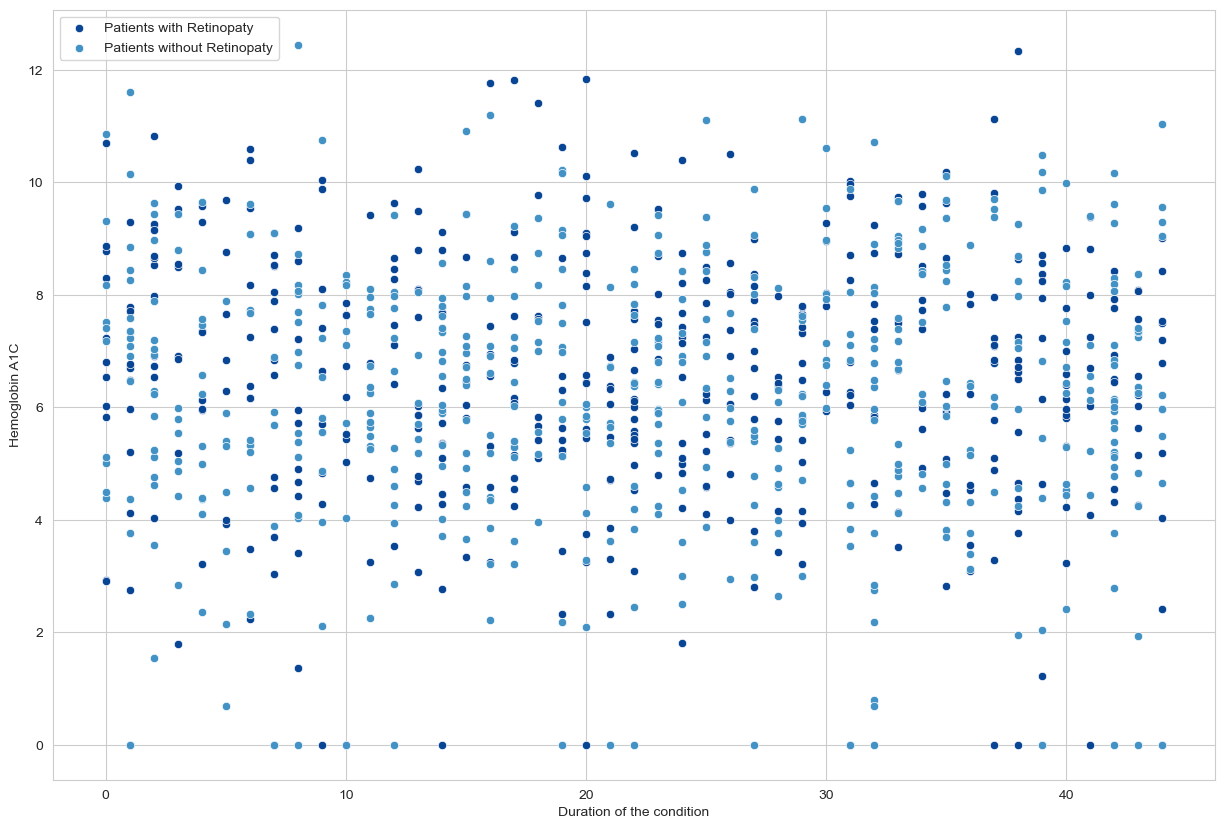

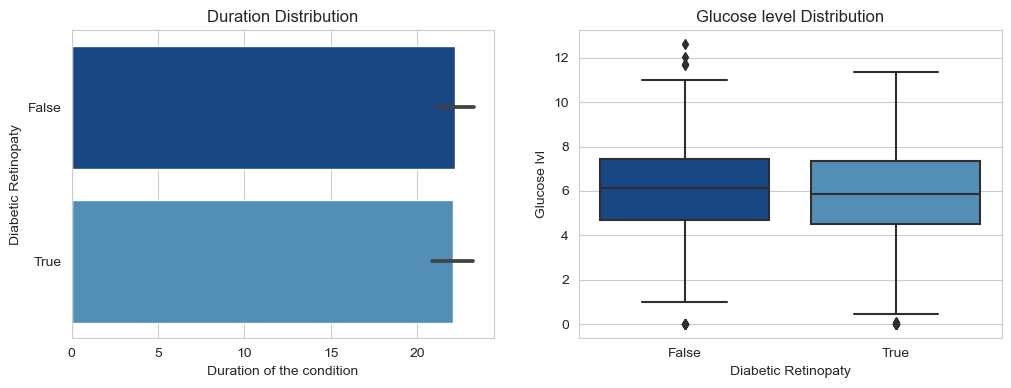

In [149]:
# Creating teo scatterplots with patients that have and have not Retinopaty, based on Duration of the condition and Hemoglobin A1C
scatterplot_1 = sns.scatterplot(x = 'Duration of the condition',y = 'Hemoglobin A1C',data = has_retinopaty,label = 'Patients with Retinopaty')
scatterplot_2 = sns.scatterplot(x = 'Duration of the condition',y = 'Hemoglobin A1C', data = has_not_retinopaty,label = 'Patients without Retinopaty')

# Designing a legend
plt.legend()


# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(y = 'Diabetic Retinopaty', x = 'Duration of the condition',data = diab_df,ax = axes[0],orient = 'horizontal')
axes[0].set_title('Duration Distribution')

sns.boxplot(x = 'Diabetic Retinopaty', y = 'Glucose lvl',data = diab_df, ax = axes[1])
axes[1].set_title('Glucose level Distribution')

#barplot_1 = sns.barplot(x = 'Duration of the condition', y = 'Hemoglobin A1C',data = has_retinopaty)
#barplot_2 = sns.barplot(x = 'Duration of the condition',y = 'Hemoglobin A1C', data = has_not_retinopaty)

# Shwoing the resaults
plt.show()

### Explenation:

##### The first plot:
<p>
    I am portraying the growth of Hemoglobin A1C level based on the Duration of the condition. I've included both of these groups, patients with retinopathy and patients without          retinopathy, in a legend and how the data grows depending on their hemoglobin levels. For this representation I choose scatterplot, and I applied the two groups with creating a legend.
</p>

##### The second plot:
<p>
    I am showing how many patients have Retinopaty and how many don't based on the duration of the disease. For this reresentation I choose the bar plot.
</p>

##### The third plot:
<p>
    I chose to show wich group,the one that has retinopathy and the one that doesn't, has higher glucouse levels. For this representatin I chose to portray th data with box plot.
</p>

---